In [ ]:
import sys

sys.executable

'/Users/habiba/miniconda3/envs/credit-fraud/bin/python'

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# Utilities
import warnings

warnings.filterwarnings("ignore")

# Plotting style
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

print("✅ All imports successful!")

✅ All imports successful!


In [ ]:
# Load dataset
df = pd.read_csv("../data/creditcard.csv")

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (284807, 31)

First few rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Dataset information
print("=== Dataset Info ===")
print(f"Total transactions: {len(df):,}")
print(f"Total features: {df.shape[1]}")
print(f"\nMissing values:")
print(df.isnull().sum().sum())

print(f"\n=== Class Distribution ===")
print(df["Class"].value_counts())
print(f"\nFraud percentage: {df['Class'].mean() * 100:.4f}%")

=== Dataset Info ===
Total transactions: 284,807
Total features: 31

Missing values:
0

=== Class Distribution ===
Class
0    284315
1       492
Name: count, dtype: int64

Fraud percentage: 0.1727%


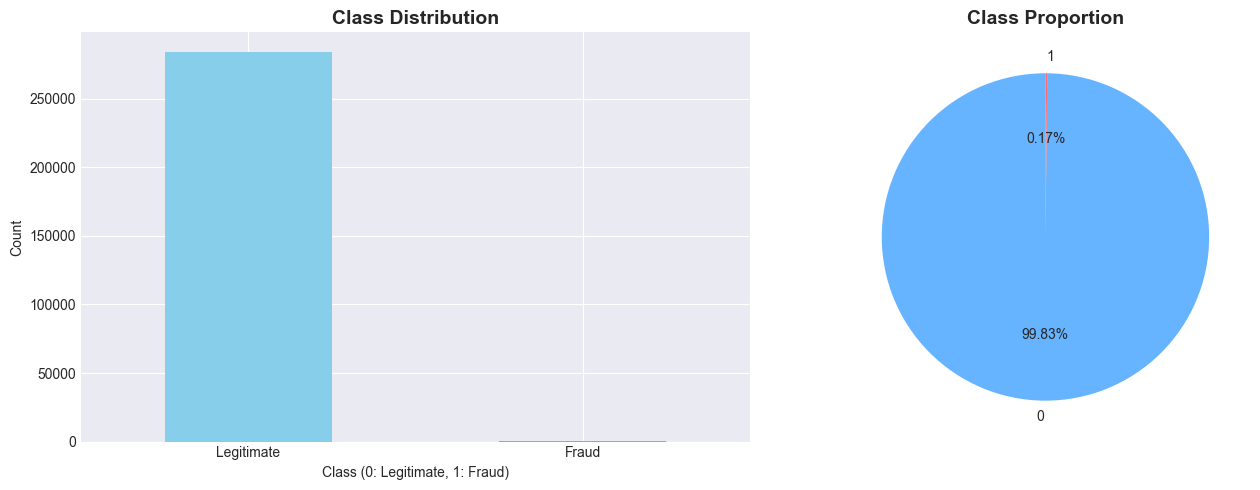

Legitimate transactions: 284,315
Fraudulent transactions: 492
Imbalance ratio: 1:578


In [ ]:
# Class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
df["Class"].value_counts().plot(kind="bar", ax=axes[0], color=["skyblue", "salmon"])
axes[0].set_title("Class Distribution", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Class (0: Legitimate, 1: Fraud)")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(["Legitimate", "Fraud"], rotation=0)

# Pie chart
colors = ["#66b3ff", "#ff6666"]
df["Class"].value_counts().plot(
    kind="pie", ax=axes[1], autopct="%1.2f%%", colors=colors, startangle=90
)
axes[1].set_title("Class Proportion", fontsize=14, fontweight="bold")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

print(f"Legitimate transactions: {(df['Class'] == 0).sum():,}")
print(f"Fraudulent transactions: {(df['Class'] == 1).sum():,}")
print(f"Imbalance ratio: 1:{(df['Class'] == 0).sum() / (df['Class'] == 1).sum():.0f}")

In [5]:
# Statistical summary
print("=== Statistical Summary ===")
df.describe()

=== Statistical Summary ===


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Amount Analysis

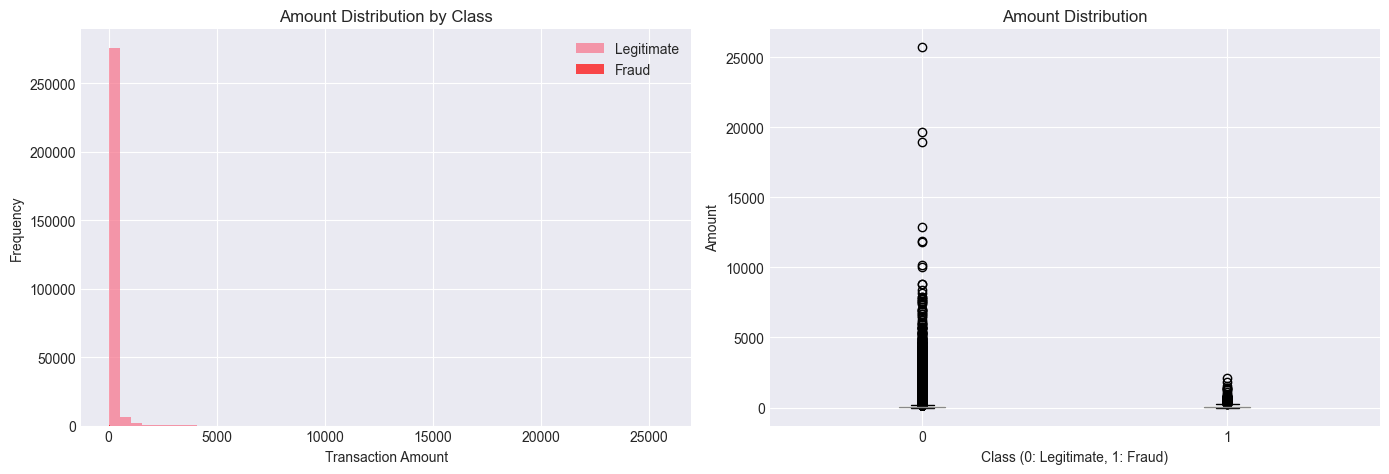


=== Amount Statistics by Class ===
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


In [ ]:
# Transaction amount analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Amount distribution by class
df[df["Class"] == 0]["Amount"].hist(bins=50, ax=axes[0], alpha=0.7, label="Legitimate")
df[df["Class"] == 1]["Amount"].hist(
    bins=50, ax=axes[0], alpha=0.7, label="Fraud", color="red"
)
axes[0].set_xlabel("Transaction Amount")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Amount Distribution by Class")
axes[0].legend()

# Box plot
df.boxplot(column="Amount", by="Class", ax=axes[1])
axes[1].set_xlabel("Class (0: Legitimate, 1: Fraud)")
axes[1].set_ylabel("Amount")
axes[1].set_title("Amount Distribution")
plt.suptitle("")

plt.tight_layout()
plt.show()

print("\n=== Amount Statistics by Class ===")
print(df.groupby("Class")["Amount"].describe())

Time Analysis

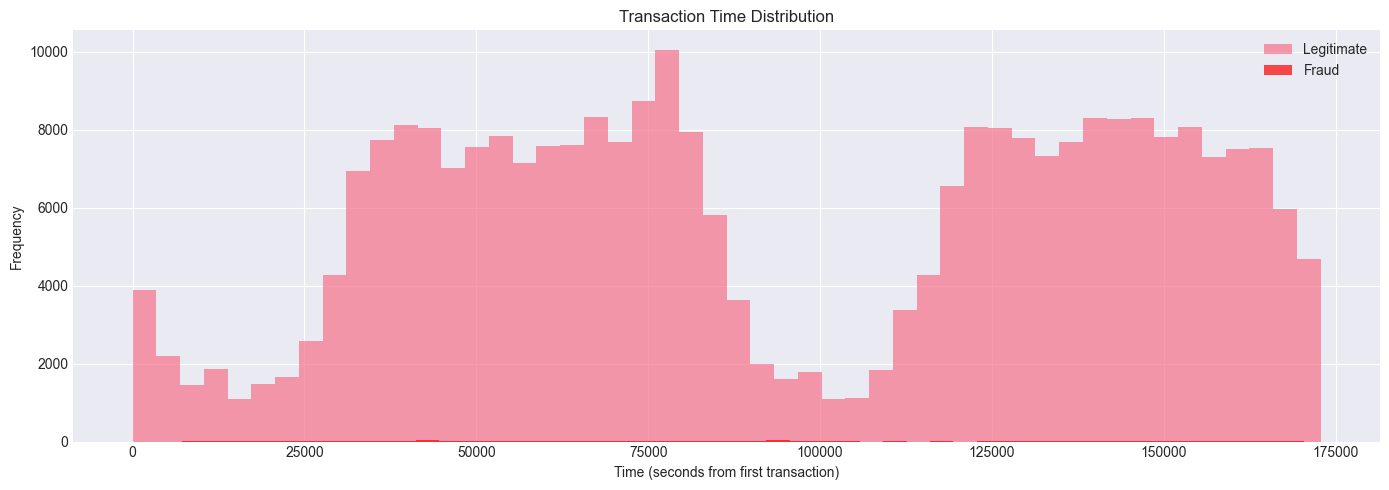

In [ ]:
# Time distribution
fig, ax = plt.subplots(figsize=(14, 5))

df[df["Class"] == 0]["Time"].hist(bins=50, alpha=0.7, label="Legitimate", ax=ax)
df[df["Class"] == 1]["Time"].hist(bins=50, alpha=0.7, label="Fraud", color="red", ax=ax)
ax.set_xlabel("Time (seconds from first transaction)")
ax.set_ylabel("Frequency")
ax.set_title("Transaction Time Distribution")
ax.legend()

plt.tight_layout()
plt.show()

Correlation Heatmap

=== Top 10 Positive Correlations with Fraud ===
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

=== Top 10 Negative Correlations with Fraud ===
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


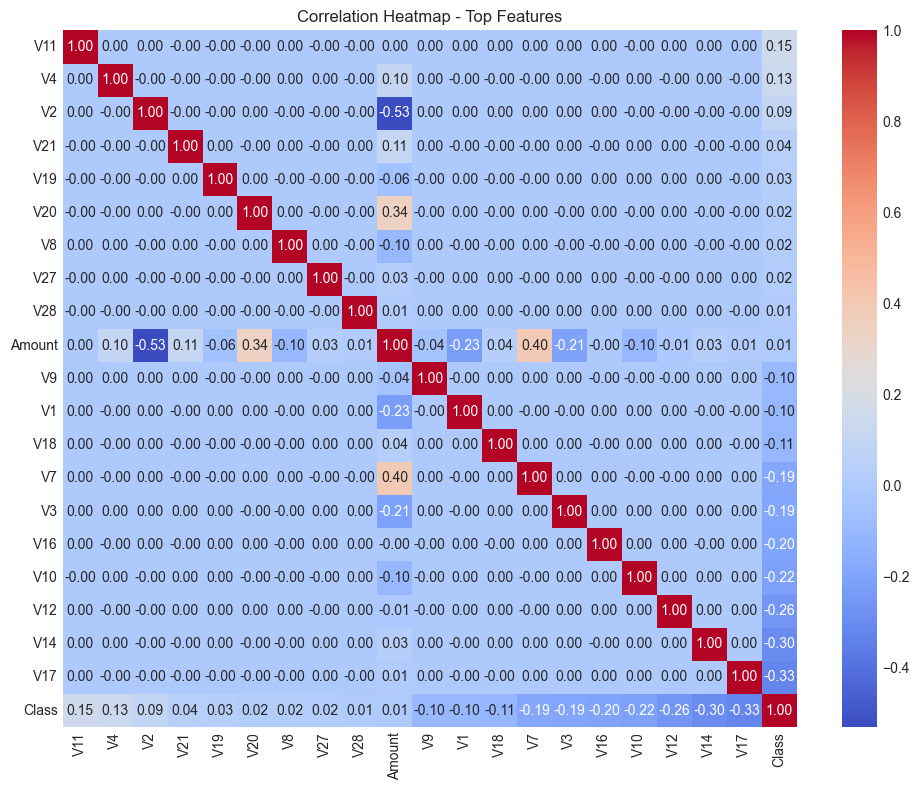

In [ ]:
# Correlation with target
correlations = df.corr()["Class"].sort_values(ascending=False)

print("=== Top 10 Positive Correlations with Fraud ===")
print(correlations.head(10))

print("\n=== Top 10 Negative Correlations with Fraud ===")
print(correlations.tail(10))

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_features = correlations[1:11].index.tolist() + correlations[-10:].index.tolist()
sns.heatmap(df[top_features + ["Class"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap - Top Features")
plt.tight_layout()
plt.show()

Prepare Data for Modeling

In [ ]:
# Separate features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split (stratified to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train):,}")
print(f"Test set size: {len(X_test):,}")
print(f"\nTraining set fraud cases: {y_train.sum():,} ({y_train.mean()*100:.4f}%)")
print(f"Test set fraud cases: {y_test.sum():,} ({y_test.mean()*100:.4f}%)")

Training set size: 227,845
Test set size: 56,962

Training set fraud cases: 394 (0.1729%)
Test set fraud cases: 98 (0.1720%)


SCALE FEATURES

In [ ]:
# Scale Amount and Time features
scaler = StandardScaler()

# Fit on training data only
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[["Amount", "Time"]] = scaler.fit_transform(X_train[["Amount", "Time"]])
X_test_scaled[["Amount", "Time"]] = scaler.transform(X_test[["Amount", "Time"]])

print("✅ Features scaled successfully!")

✅ Features scaled successfully!
